# Fashion Trend Forcasting

In this Data Science project, we work with a dataset crawled from the [Amazon Men's Clothing](https://www.amazon.com/Men-Clothing/b?ie=UTF8&node=1040658) website. Our ultimate goal is when given a new product unreleased on the platform, we will be able to forecast its **total rating** and **weighted rating**.
In order to accomplish this, our project will go through these phases:

1. 

## Import Libraries and Read Data

In [559]:
# Libraries to manipulate data
import numpy as np
import pandas as pd
import json

# Modules, classes, and methods from scikit-learn
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Others
import matplotlib.pyplot as plt
import joblib

## Read the Dataset and Split it into Train Set and Test Set

In [560]:
# Read the data from the json file
data_path = "../data/raw/fashion_products.json"
with open(data_path) as f:
    data = json.load(f)

# Normalize the data and create a dataframe
df = pd.json_normalize(data)
df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,adidas Men's Athletic Cushioned Crew Socks wit...,13.99,13.99,42763,"[79, 12, 5, 2, 2]","[Black/Aluminum 2, Heather Grey/Black, White/B...",Cushioned in the foot for comfort and durabili...,"97% Polyester, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Performance Cushion Crew Socks with Band ...,28.22,37.00,8619,"[79, 10, 5, 2, 5]","[Black/White, White/Black]",Reinforced heel and toe for enhanced durabilit...,76% Cotton/21% Nylon/2% Spandex/1% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thermajohn Long Johns Thermal Underwear for Me...,25.49,31.99,52418,"[76, 14, 5, 2, 3]","[Black, Charcoal, Grey, Navy, White, Christmas...",Heat Retention: When it comes to warmth and ev...,"92% Polyester, 8% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Calvin Klein Men's Cotton Stretch 7-Pack Boxer...,54.05,76.53,12714,"[75, 12, 6, 3, 6]","[2 Blue Shadow, 2 White, 2 Black, 1 Cobalt Wat...","COTTON STRETCH: Spun in pure, premium cotton y...","95% Cotton, 5% Elastane",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Hoodie, EcoSmart Fleece Hoodie, Ho...",11.46,11.46,176801,"[72, 15, 7, 3, 4]","[Army Brown, Ash, Black, Cardinal, Charcoal He...",FLEECE TO FEEL GOOD ABOUT - Hanes EcoSmart men...,"50% Cotton, 50% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   title                                   4690 non-null   object 
 1   price_min                               4690 non-null   float64
 2   price_max                               4690 non-null   float64
 3   rating_total                            4690 non-null   int64  
 4   rating_percent                          4580 non-null   object 
 5   variants                                4690 non-null   object 
 6   product_about                           4690 non-null   object 
 7   product_details.Fabric type             4526 non-null   object 
 8   product_details.Care instructions       4449 non-null   object 
 9   product_details.Origin                  4049 non-null   object 
 10  product_details.Fit type                146 non-null    obje

- By observing basic information of the data using the `.info()` method, we can see that there are many columns missing very large proportion of data.

In [562]:
# # NOTICE: WE ONLY RUN THIS PIECE OF CODE 1 TIME. PLEASE DON'T UNCOMMENT
# # CHÚ Ý: ĐỪNG THÁO COMMENT ĐOẠN CODE NÀY

# # Sample 80% of the data for training and 20% for testing
# train, test = train_test_split(df, test_size=0.2)

# # Save the train and test data
# train.to_csv("../data/raw/train.csv", index=False)
# test.to_csv("../data/raw/test.csv", index=False)

## Data Preparation

In [563]:
# Read the train set
train_df = pd.read_csv("../data/raw/train.csv")

# Inspect the train set
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,"[74, 14, 5, 3, 3]",[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"[82, 8, 5, 1, 4]","['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"[68, 18, 5, 4, 5]","['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"[66, 16, 8, 3, 8]","['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"[74, 14, 6, 2, 4]","['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

#### Handle Missing Data

In [564]:
# We will drop columns with more than 30% missing values.
null_percents = train_df.isnull().sum() / len(train_df) * 100
null_percents

title                                       0.000000
price_min                                   0.000000
price_max                                   0.000000
rating_total                                0.000000
rating_percent                              2.558635
variants                                    0.000000
product_about                               1.359275
product_details.Fabric type                 3.651386
product_details.Care instructions           5.117271
product_details.Origin                     13.486141
product_details.Fit type                   96.855011
product_details.Pattern                    86.833689
product_details.Closure type               55.490405
product_details.Rise style                 98.001066
product_details.Weave type                 97.414712
product_details.Country of Origin          92.190832
product_details.Neck style                 95.495736
product_details.Leg style                  99.546908
product_details.Fur description            99.

In [565]:
drop_columns = [column for column in null_percents.index if null_percents[column] > 30]
drop_columns

['product_details.Fit type',
 'product_details.Pattern',
 'product_details.Closure type',
 'product_details.Rise style',
 'product_details.Weave type',
 'product_details.Country of Origin',
 'product_details.Neck style',
 'product_details.Leg style',
 'product_details.Fur description',
 'product_details.Outer material',
 'product_details.Length',
 'product_details.Bottom style',
 'product_details.Sole material',
 'product_details.Water resistance level',
 'product_details.Sleeve type',
 'product_details.Inseam',
 'product_details.Shaft height',
 'product_details.Pocket style',
 'product_details.Shaft circumference',
 'product_details.Inner material',
 'product_details.Material',
 'product_details.Item type name']

- Later, when we deal with the test set, we also need to drop these columns to align with the train set.

In [566]:
# Now, we will drop the columns with more than 30% missing values.
train_df = train_df.drop(columns=drop_columns)
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,"[74, 14, 5, 3, 3]",[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"[82, 8, 5, 1, 4]","['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"[68, 18, 5, 4, 5]","['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"[66, 16, 8, 3, 8]","['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"[74, 14, 6, 2, 4]","['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported


In [567]:
# Check the result after dropping columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   rating_percent                     3656 non-null   object 
 5   variants                           3752 non-null   object 
 6   product_about                      3701 non-null   object 
 7   product_details.Fabric type        3615 non-null   object 
 8   product_details.Care instructions  3560 non-null   object 
 9   product_details.Origin             3246 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 293.2+ KB


- We need to admit that there are features/variables we cannot impute, those are:
  - `rating_percent`
  - `product_about`
  - `product_details.Fabric type`
  - `product_details.Care instructions`
  - `product_details.Origin`
- We need to decide whether to drop rows missing these feature or fill them with `"unknown"` (for categorical variable) or 0 (for numerical variable). At this point, we choose not to drop any rows but fill them instead.

##### Rating percent

In [568]:
# Check for missing values on "rating_percent" column
train_df['rating_percent'].isnull().sum()

96

In [569]:
# Convert 'rating_percent' from string like "[[76, 12, 7, 2, 3]]"" to list of integers
def convert_rating_percent(x) -> list:
    # If x is not string, return an empty list
    if not isinstance(x, str):
        return []

    x = x.replace('None', '0')
    x = x.strip('[]').split(', ')
    result = list(map(int, x))
    
    return result

train_df['rating_percent'] = train_df['rating_percent'].apply(convert_rating_percent)
train_df['rating_percent']

0       [74, 14, 5, 3, 3]
1        [82, 8, 5, 1, 4]
2       [68, 18, 5, 4, 5]
3       [66, 16, 8, 3, 8]
4       [74, 14, 6, 2, 4]
              ...        
3747    [71, 15, 7, 3, 4]
3748    [72, 13, 6, 3, 5]
3749     [77, 9, 5, 4, 5]
3750     [81, 7, 6, 2, 4]
3751    [77, 10, 6, 2, 7]
Name: rating_percent, Length: 3752, dtype: object

- By observing the result of the cell above, we can see that the last row (the `3751`th row) has its sum not to be `100`, which is illogical because the total percentage of all type of ratings (from `1` to `5`) must be `100%`. So, we can feel that there'r something weird about the values of this `rating_percent` column; thereby needing to investigate. We will calculate the sum of each rows in this column and inspect the unique sums resulted.

In [570]:
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    2267
99      729
101     644
0        96
102       9
98        7
Name: count, dtype: int64

- We admit that the amount of errorneous values are huge and therefore dropping all of them can cause a unacceptable loss of information. So, we need to find out a way to scale each values of the column to make their sum become 100 without significantly changing the actual meaning of them.

In [571]:
def scale_rating_percent(rating_percent: list[int]) -> list[int]:
    """
    This function scales the rating_percent list to make its sum to be 100.
    """
    
    # If after the conversion above, the rating percent is empty,
    # in this function, we will do nothing.
    if len(rating_percent) == 0:
        return rating_percent
    
    current_sum = sum(rating_percent)
    
    if current_sum == 100:
        return rating_percent
    
    values_to_distribute = 100 - current_sum # This can be positive or negative.
    
    unit = 1 if values_to_distribute > 0 else -1
    
    for i in range(abs(values_to_distribute)):
        # Add unit to a random position in rating_percent
        rating_percent[np.random.randint(5)] += unit
    
    return rating_percent

In [572]:
# Let's test the function above with an errorneous list
errorneous_list = [77, 10, 6, 2, 7]
sum(scale_rating_percent(errorneous_list))

100

- Okay it's worked. Now we apply this function on the `rating_percent` column.

In [573]:
train_df['rating_percent'] = train_df['rating_percent'].apply(scale_rating_percent)
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    3656
0        96
Name: count, dtype: int64

In [574]:
def calc_weighted_rating(rating_percent) -> np.float64:
    if len(rating_percent) != 5:
        return np.nan
    
    rating_percent = np.array(rating_percent.copy()) / 100
    rating_scale = [5, 4, 3, 2, 1]
    
    return np.dot(rating_percent, rating_scale)

In [575]:
train_df['weighted_rating'] = train_df['rating_percent'].apply(func=calc_weighted_rating)
train_df['weighted_rating'].head()

0    4.51
1    4.63
2    4.40
3    4.29
4    4.52
Name: weighted_rating, dtype: float64

In [576]:
train_df.drop(columns=['rating_percent'], inplace=True)
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,NaN,4.51
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,4.63
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,4.40
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.29
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,4.52


In [577]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3701 non-null   object 
 6   product_details.Fabric type        3615 non-null   object 
 7   product_details.Care instructions  3560 non-null   object 
 8   product_details.Origin             3246 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


- Actually, from the start of this step (Handling Missing Data) until this point, we're just doing feature engineering on `rating_percent`, no actual "handling missing data" was performed. But as we wrote above (right before the "Rating percent" cell), there're just only 2 strategies that we chose to handle missing data in this step: dropping or filling (Why? Simply because we want to keep the "Imputation and Removal" step separately later.), **AND** both strategies won't work well on the `weighted_rating`, **SO** we decide to impute the weighted_rating later in the "Imputation and Removal" step. But why do we think both strategies won't work well?
  - Why not "dropping"? Simply because we want to keep as much data points as we can. 
  - Why not "filling"? Because we think it is feasible to do imputation for missing values on this column.

##### Product about, Fabric type, Care instructions and Origin

In [578]:
# Fill missing value of `product_about` with empty string
train_df['product_about'] = train_df['product_about'].fillna('')

# Fill missing value of `product_details.Fabric type`, `product_details.Care instructions`,
# and `product_details.Origin` with "unknown"
train_df['product_details.Fabric type'] = train_df['product_details.Fabric type'].fillna('unknown')
train_df['product_details.Care instructions'] = train_df['product_details.Care instructions'].fillna('unknown')
train_df['product_details.Origin'] = train_df['product_details.Origin'].fillna('unknown')

In [579]:
# Let's check the result after filling missing values of those `object`-typed columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


#### Encode Categorical Variables

- As far as we've learned, we think it will be the best to encode categorical variables before stepping into any imputation or removal tasks.

In [580]:
# Count unique values of each column
unique_values = train_df.nunique()
unique_values

title                                3714
price_min                            1381
price_max                            1189
rating_total                         2287
variants                             3049
product_about                        3487
product_details.Fabric type          1270
product_details.Care instructions     197
product_details.Origin                 58
weighted_rating                       343
dtype: int64

In [581]:
train_df['product_details.Fabric type'].value_counts()

product_details.Fabric type
100% Polyester                                                                                        478
100% Cotton                                                                                           463
unknown                                                                                               137
Polyester                                                                                              92
60% Cotton, 40% Polyester                                                                              81
                                                                                                     ... 
77%Combed Cotton, 22%Nylon, 1%Lycra                                                                     1
Fabric: 100%Cotton/ Lining: 20%Cotton, 80%Polyester                                                     1
65% Viscose made from bamboo; 29% Cotton; 6% Spandex                                                    1
60 % Rayon made fr

- We can see that the values in this column are not initially suitable to be encoded and doing data cleaning on this column is time-consuming. Therefore, we will embed them using a small embedding model in the Feature Engineering step later. And this happens the same with `product_details.Care instructions` and `product_details.Origin`.

#### Imputation and Removal

- In this sub-step of imputation and removal, we only need to impute the missing values of the `weighted_rating` column. But, before doing any "imputation", we need to determine the "missing data mechanism" of this column in order to choose the appropriate "imputation method".
- There are 3 missing data mechanisms:
  - **Missing Completely at Random (MCAR)**: The missingness is totally random and unrelated to any data. Imputation here is straightforward and less likely to introduce bias.
  - **Missing at Random (MAR)**: The missingness is related to other observed variables but not the missing one itself. With the right techniques, imputation can still be effective.
  - **Missing Not at Random (MNAR)**: The missingness is related to the value of the missing data itself. Imputation in this scenario is tricky and can introduce bias.

##### Missing Data Mechanism of `weighted_rating`

In [582]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


In [583]:
# Check if data is MCAR
numerical_columns = train_df.select_dtypes(include=[np.number]).columns
mt = MCARTest(method="little")
mt.little_mcar_test(train_df[numerical_columns])

0.0

- This is a very low p-value for Little's test (`p-value < 0.05`), so we can reject the null hypothesis that our data are MCAR. Therefore, the missing mechanism of our data should be MAR or MNAR.
- In order to check whether our data is MAR or not, we need to see if missingness of `weighted_rating` is related to known variables or not.

In [584]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3652 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


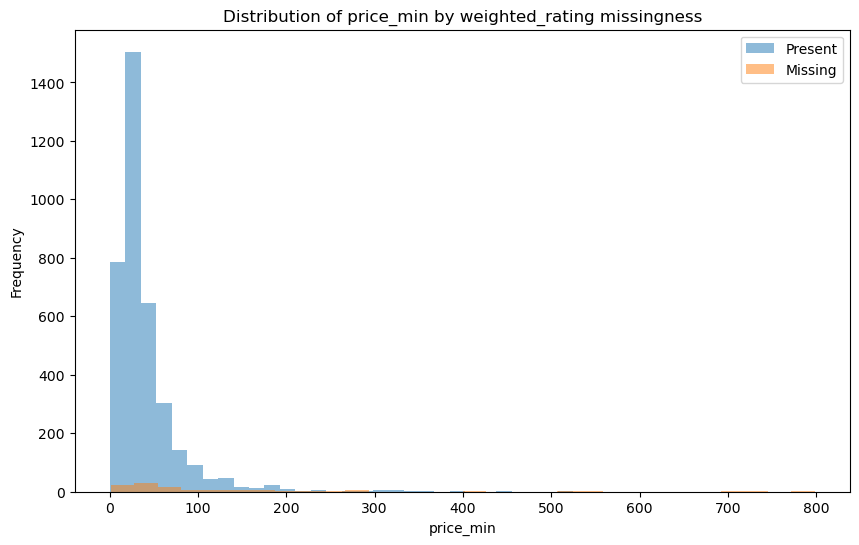

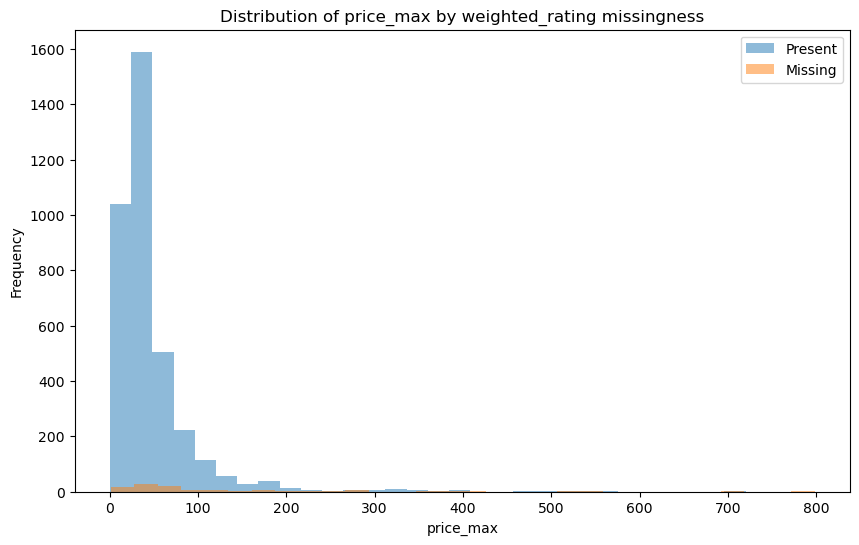

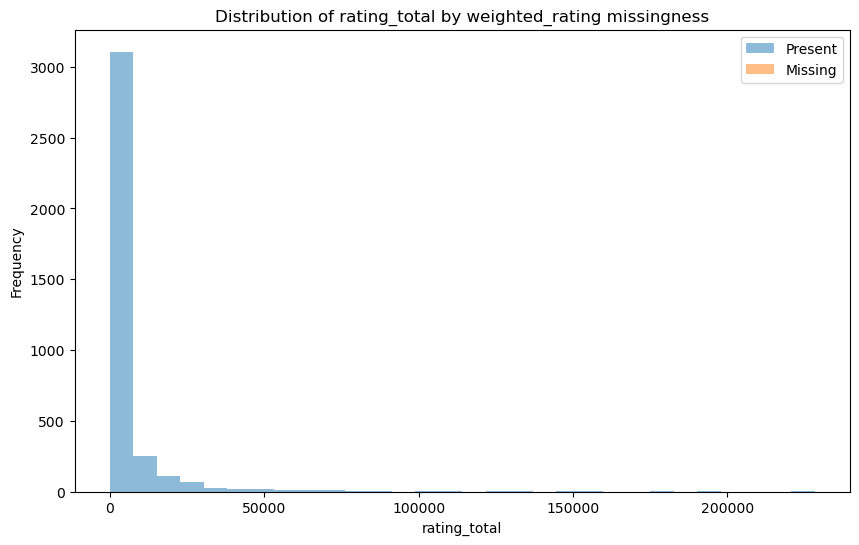

In [585]:
def visualize_distributions_for_mnar_test(df: pd.DataFrame, var: str):
    # Create a column named `{var}_missing` indicating
    # if the weighted_rating of that row is missing or not
    df[f'{var}_missing'] = df[var].isnull()
    
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=np.number)
    
    # Loop over columns in numerical columns
    for column in numerical_columns.columns:
        if column == var:  # Skip the column we're testing
            continue
            
        # Select rows where var is NOT missing (group_missing=False)
        group_not_missing = df[~df[f'{var}_missing']][column]
        
        # Select rows where var IS missing (group_missing=True)
        group_missing = df[df[f'{var}_missing']][column]
        
        # Only plot if we have valid data
        if len(group_missing) > 0 and len(group_not_missing) > 0:
            plt.figure(figsize=(10, 6))
            plt.hist(group_not_missing.dropna(), bins=30, alpha=0.5, label='Present')
            plt.hist(group_missing.dropna(), bins=30, alpha=0.5, label='Missing')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {column} by {var} missingness')
            plt.legend()
            plt.show()
        
    # Drop the temporary missing indicator column
    df.drop(columns=[f'{var}_missing'], inplace=True)
    
visualize_distributions_for_mnar_test(train_df, 'weighted_rating')

##### Imputation

#### Handle Duplicates

In [586]:
# Identify duplicate rows
duplicates = train_df.duplicated()
duplicates.sum()

11

In [587]:
# Remove duplicate rows
train_df = train_df.drop_duplicates()
train_df.shape

(3741, 10)

In [588]:
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,unknown,4.51
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,4.63
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,4.40
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.29
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,4.52


#### Package Data Cleaning Step into a Function

### Data Transformation

#### Standardize Column Names

In [589]:
train_df.columns

Index(['title', 'price_min', 'price_max', 'rating_total', 'variants',
       'product_about', 'product_details.Fabric type',
       'product_details.Care instructions', 'product_details.Origin',
       'weighted_rating'],
      dtype='object')

In [590]:
def standardize_column_names(col_name: str) -> str:
    # Delete 'product_details.'
    new_name = col_name.replace('product_details.', '')
    
    # Replace '_' with ' '
    new_name = new_name.replace('_', ' ')
    
    # Lowercase column names
    new_name = new_name.lower()
    
    return new_name

new_col_names = [standardize_column_names(col_name) for col_name in train_df.columns]
train_df.columns = new_col_names
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,unknown,4.51
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,4.63
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,4.40
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.29
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,4.52


#### Handle Outliers

In [591]:
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,Dickies Genuine Men's 5-pair Crew Style Work S...,4.56,4.56,279,[],Ventilated Breathing Channel - For air circula...,Cotton,Machine Wash,unknown,4.51
1,Nike Men`s Essential Micro Boxer Briefs 3 Pack,34.90,76.00,726,"['Black', 'Aquarius Blue/Laser Fuchia/Cool Gre...",100% Cotton\nMade in the USA or Imported\nPull...,100% Cotton,Machine Wash,Made in the USA or Imported,4.63
2,Carhartt Men's 100 percentage Cotton Midweight...,27.99,35.99,245,"['Black Heather', 'Heather Grey']",Waffle knit traps heat; smooth flatlock seams;...,100% Cotton,Machine Wash,Imported,4.40
3,Alimens & Gentle Men's Dress Shirts French Cuf...,24.99,26.99,3437,"['White', 'Black', 'Twilled Pink', 'Twilled Bl...",Alimens & Gentle Design French Cuffs Shirt; Co...,"60% Cotton, 40% Polyester",Machine Wash,Imported,4.29
4,"Hanes Men's Work Socks, 6-Pack",6.71,6.71,2732,"['Black', 'White']",COMFORT YOU DESERVE – Cushioned foot bottom fo...,"51% Polyester, 42% Cotton, 4% Nylon, 3% Spandex",Machine Wash,Imported,4.52


In [592]:
# Function to draw boxplot given column name
def draw_boxplot(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

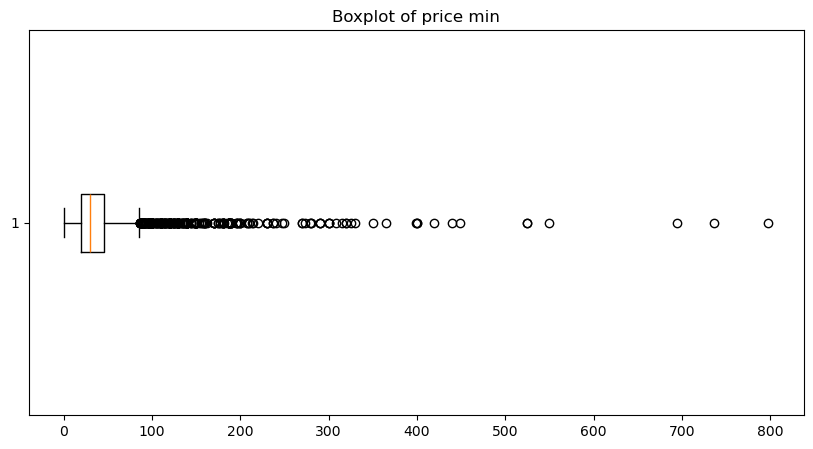

In [593]:
# Draw boxplot for "price min"
draw_boxplot(train_df, 'price min')

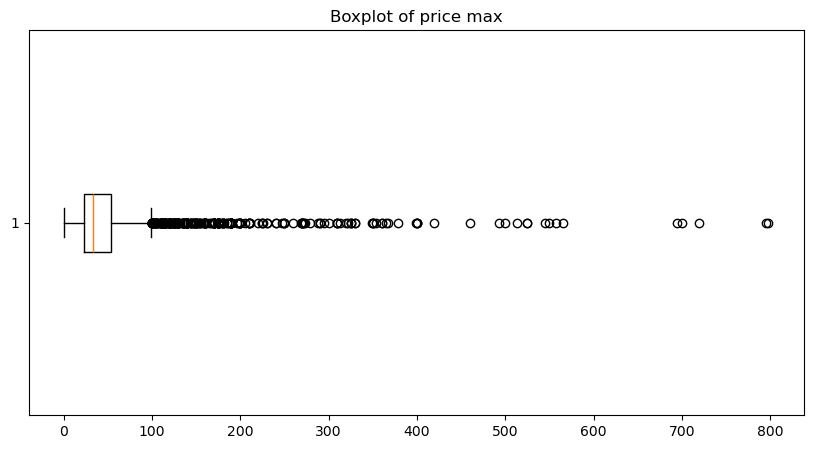

In [594]:
# Draw boxplot for "Price max"
draw_boxplot(train_df, 'price max')

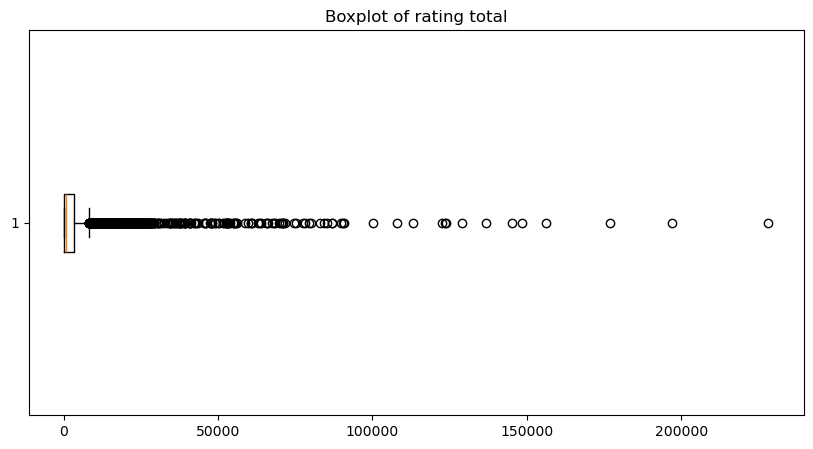

In [595]:
# Draw boxplot for "Rating total"
draw_boxplot(train_df, 'rating total')

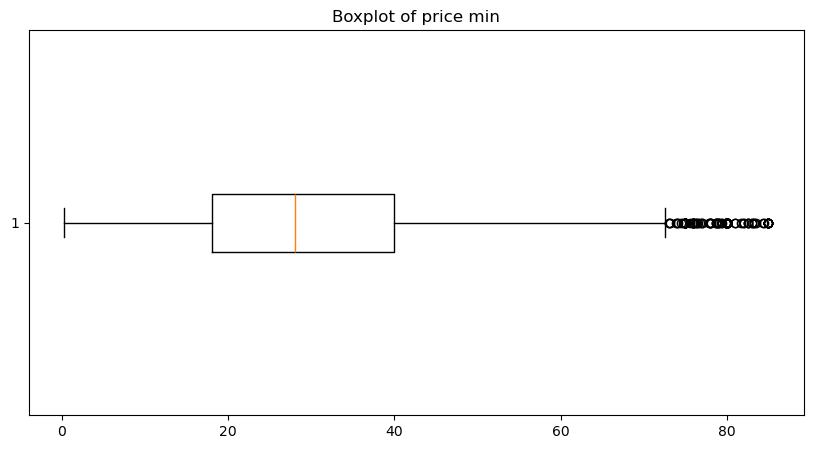

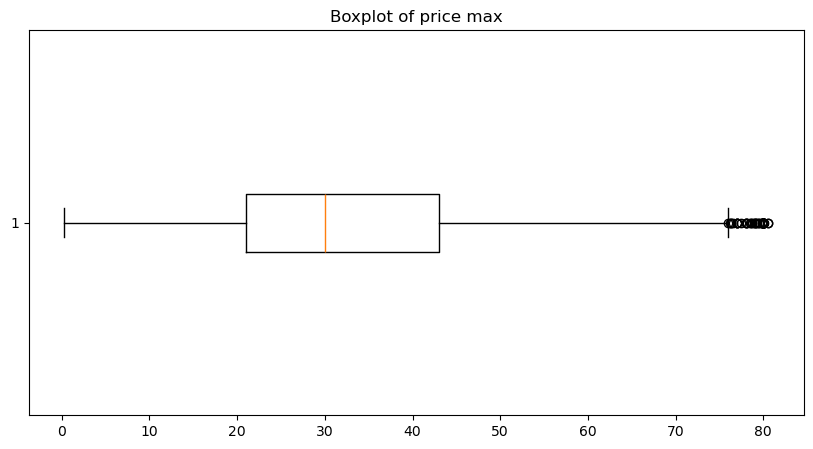

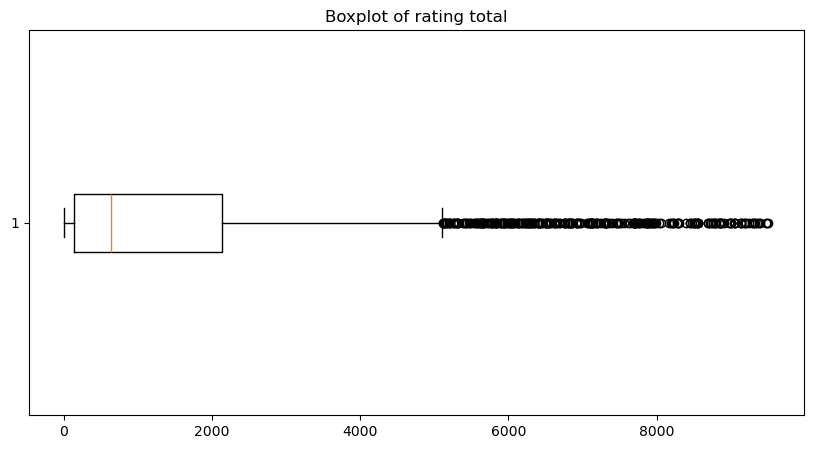

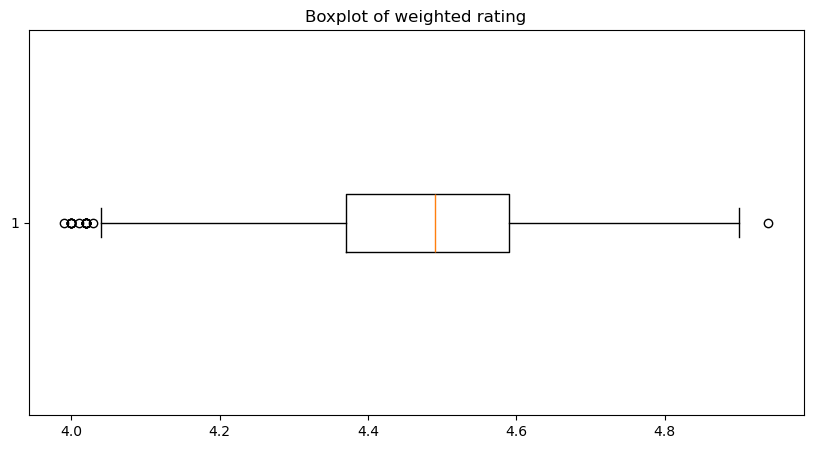

In [596]:
# Iterate over the numerical columns
numerical_columns = ["price min", "price max", "rating total", "weighted rating"]
for column in numerical_columns:
    # Calculate IQR
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    train_df = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    
    # Draw boxplot
    draw_boxplot(train_df, column)

#### Scale and Normalize Data

In [597]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the train data
scaler.fit(train_df[numerical_columns])

# Transform the numerical columns of the train data
numerical_columns_scaled = pd.DataFrame(scaler.transform(train_df[numerical_columns]), columns=numerical_columns)
numerical_columns_scaled.describe()

,price min,price max,rating total,weighted rating
count,2.684000e+03,2.684000e+03,2.684000e+03,2.684000e+03
mean,-2.574526e-16,-3.918045e-16,3.706259e-17,7.174258e-16
std,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00
min,-1.717073e+00,-1.865842e+00,-7.799671e-01,-2.916172e+00
25%,-6.639793e-01,-6.843038e-01,-6.928733e-01,-6.374107e-01
50%,-1.379988e-01,-1.917680e-01,-4.440998e-01,8.219825e-02
75%,5.256373e-01,5.196725e-01,2.892491e-01,6.818723e-01
max,3.074816e+00,2.522104e+00,3.624759e+00,2.780732e+00


In [598]:
train_df.reset_index(drop=True, inplace=True)
# Replace the numerical columns with the scaled values
train_df[numerical_columns] = numerical_columns_scaled
train_df[numerical_columns].describe()

,price min,price max,rating total,weighted rating
count,2.684000e+03,2.684000e+03,2.684000e+03,2.684000e+03
mean,-2.574526e-16,-3.918045e-16,3.706259e-17,7.174258e-16
std,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00
min,-1.717073e+00,-1.865842e+00,-7.799671e-01,-2.916172e+00
25%,-6.639793e-01,-6.843038e-01,-6.928733e-01,-6.374107e-01
50%,-1.379988e-01,-1.917680e-01,-4.440998e-01,8.219825e-02
75%,5.256373e-01,5.196725e-01,2.892491e-01,6.818723e-01
max,3.074816e+00,2.522104e+00,3.624759e+00,2.780732e+00


### Feature Engineering

In [599]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684 entries, 0 to 2683
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2684 non-null   object 
 1   price min          2684 non-null   float64
 2   price max          2684 non-null   float64
 3   rating total       2684 non-null   float64
 4   variants           2684 non-null   object 
 5   product about      2684 non-null   object 
 6   fabric type        2684 non-null   object 
 7   care instructions  2684 non-null   object 
 8   origin             2684 non-null   object 
 9   weighted rating    2684 non-null   float64
dtypes: float64(4), object(6)
memory usage: 209.8+ KB


In [600]:
# Concate all fabric types into a single string
fabric_types = train_df['fabric type'].str.cat(sep=', ')
fabric_types

# Lowercase the string
fabric_types = fabric_types.lower()

# Delete all number characters in the string
fabric_types = ''.join([i for i in fabric_types if not i.isdigit()])
fabric_types

# Replace all special characters commas, and whitespaces with a single whitespace
fabric_types = ' '.join(fabric_types.split())
fabric_types

# Replace all % with commas
fabric_types = fabric_types.replace('%', ',')
fabric_types

# Split the string into a list of fabric types
fabric_types = fabric_types.split(',')
fabric_types

# Remove spaces at the beginning and end of each fabric type
fabric_types = [fabric_type.strip() for fabric_type in fabric_types]
fabric_types

# Count the frequency of each fabric type
fabric_type_counts = pd.Series(fabric_types).value_counts().to_frame()
fabric_type_counts

# Export the fabric type counts to a CSV file
fabric_type_counts.to_csv("fabric_type_counts.csv")

In [601]:
fabrics = [
    "acrylic",
    "alpaca wool",
    "bamboo viscose",    # includes “rayon derived/made from bamboo”
    "combed cotton",
    "coolmax polyester",
    "coral fleece",
    "cotton",
    "cotton/polyester",
    "denim",
    "elastane",          # includes “lycra elastane”
    "eva",
    "faux fur",
    "faux leather",
    "flannel",
    "fleece",            # includes variants like “french terry fleece”, “everest fleece”
    "knit",              # “knit fabric” or “knitted”
    "linen",
    "lycra",
    "merino wool",       # also appears in “merino wool/nylon/elastane”
    "mesh",
    "modal",
    "mulberry silk",     # includes references like “natural mulberry silk”
    "nylon",
    "olefin",
    "organic cotton",
    "performance cotton",
    "plush",
    "poly",              # sometimes shorthand for polyester
    "polyamide",
    "polybutylene terephthalate",  # PBT
    "polyester",         # includes “recycled polyester”, “polyester/spandex”
    "polypropylene",
    "polyurethane",      # often appears as PU
    "pvc",
    "rayon",             # includes “rayon made/derived from bamboo”
    "rubber",
    "satin",             # includes “silky satin”
    "sheep's wool",
    "sherpa-velour",
    "silk",
    "silky polyester",
    "spandex",           # includes references like “spandex hacci jersey”
    "tencel lyocell",
    "textile",           # sometimes just “textile synthetics”
    "tri blend",
    "velour",
    "velvet",
    "viscose",           # includes “viscose made from bamboo”
    "wicking fabric",
    "wool"
]
len(fabrics)
# The length of the vector encoding each fabric type is 50,
# which is the length of the `fabrics` list.

50

In [602]:
train_df['fabric type'].apply(lambda x: x.lower()).to_frame().head(20)

,fabric type
0,cotton
1,100% cotton
2,100% cotton
3,"60% cotton, 40% polyester"
4,"51% polyester, 42% cotton, 4% nylon, 3% spandex"
5,"70% merino wool, 23% polyester, 5% spandex, 2%..."
6,"polyester,spandex"
7,"70% acrylic, 28% polyester, 2% rubber"
8,"88% recycled polyester, 12% elastane"
9,"90% cotton, 10% polyester"


In [558]:
import re

# Create a matrix of zeros with the same number of rows as the train data
# and the same number of columns as the number of fabric types
fabric_type_matrix = np.zeros((train_df.shape[0], len(fabrics)))

# Iterate over the rows of the train data
for i, fabric_type in enumerate(train_df['fabric type'].apply(lambda x: x.lower())):
    # Iterate over the fabric types
    for j, fabric in enumerate(fabrics):
        # If the fabric type contains the fabric, look for percentage
        # using regex
        regex = f"(\d+)%? {fabric}"
        match = re.search(regex, fabric_type)
        
        # If a match is found, extract the percentage and store it
        if match:
            fabric_type_matrix[i, j] = int(match.group(1)) / 100
        
# Create a DataFrame from the fabric type matrix
fabric_type_df = pd.DataFrame(fabric_type_matrix, columns=fabrics)
fabric_type_df.describe()

,acrylic,alpaca wool,bamboo viscose,combed cotton,coolmax polyester,coral fleece,cotton,cotton/polyester,denim,elastane,...,silky polyester,spandex,tencel lyocell,textile,tri blend,velour,velvet,viscose,wicking fabric,wool
count,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.0,2688.000000,2688.0,2688.0,2688.000000,...,2688.000000,2688.000000,2688.000000,2688.000000,2688.0,2688.0,2688.0,2688.000000,2688.000000,2688.000000
mean,0.013415,0.000372,0.000115,0.008065,0.000711,0.0,0.259308,0.0,0.0,0.004535,...,0.000342,0.016689,0.000156,0.001116,0.0,0.0,0.0,0.010260,0.000372,0.006548
std,0.094835,0.019288,0.005979,0.079735,0.021642,0.0,0.396032,0.0,0.0,0.022815,...,0.017745,0.045416,0.005727,0.033395,0.0,0.0,0.0,0.086603,0.019288,0.061627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.600000,0.0,0.0,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.310000,1.000000,0.930000,0.0,1.000000,0.0,0.0,0.310000,...,0.920000,1.000000,0.210000,1.000000,0.0,0.0,0.0,0.950000,1.000000,1.000000
